In [525]:
# importing requirements

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import operator

In [526]:
# !pip3 install geopandas
import geopandas as gpd
import_indep = gpd.read_file('shp_trade_dep.gpkg')
imports_data = import_indep[['cntry', 'admin','country','yr2013']]
imports_data.head()

,cntry,admin,country,yr2013
0,None,Saint Barthelemy,None,NaN
1,None,Jersey,None,NaN
2,None,Ashmore and Cartier Islands,None,NaN
3,None,Siachen Glacier,None,NaN
4,None,Indian Ocean Territories,None,NaN


In [527]:
all_countries = [
    
    'Argentina', 'Australia', 'Bulgaria',
    'Belize', 'Brazil', 'Canada', 'Denmark',
    'France', 'Hungary', 'Kazakhstan',
    'Lithuania', 'Latvia', 'Paraguay',
    'Ukraine', 'Uruguay', 'United States of America',
    'Belarus', 'Botswana', 'Estonia',
    'Finland', 'Georgia', 'Iran', 'Libya',
    'Lesotho', 'Moldova', 'Mongolia',
    'Norway', 'New Zealand', 'Poland',
    'Portugal', 'Russia', 'Swaziland',
    'Tunisia',
    'United Arab Emirates', 'Belgium',
    'Brunei', 'Cyprus', 'Djibouti', 'Algeria',
    'Gambia', 'Iraq', 'Israel', 'Jordan',
    'Japan', 'South Korea', 'Kuwait',
    'Lebanon', 'Montenegro',
    'Mauritania', 'Netherlands', 'Saudi Arabia', 'Singapore', 'Trinidad and Tobago', 'Yemen',
    'Afghanistan', 'Angola', 'Burundi',
    'Bangladesh', 'Cameroon',
    'Democratic Republic of the Congo',
    'Republic of Congo', 'Dominican Republic', 'Egypt', 'Eritrea', 'Ethiopia',
    'Ghana', 'Guinea Bissau',
    'Guatemala', 'Haiti', 'India', 'Jamaica',
    'Kenya', 'Sri Lanka', 'Madagascar',
    'Mozambique', 'Malawi', 'Niger',
    'Nigeria', 'Nepal', 'Oman', 'Pakistan',
    'Philippines', 'Puerto Rico', 'North Korea', 'Rwanda', 'El Salvador',
    'Syria', 'Togo', 'Uganda',
    'Benin', 'Burkina Faso', 'Bolivia',
    'China', 'Ivory Coast', 'Colombia',
    'Costa Rica', 'United Kingdom',
    'Guinea', 'Honduras', 'Indonesia',
    'Ireland', 'Luxembourg', 'Mexico',
    'Malaysia', 'Panama', 'Sudan',
    'Senegal', 'Sierra Leone', 'Tajikistan',
    'Tanzania', 'Uzbekistan', 'Vietnam',
    'Zambia', 'Gabon', 'Equatorial Guinea',
    'Morocco', 'Peru',
    'Albania', 'Austria', 'Azerbaijan',
    'Bosnia and Herzegovina', 'Chile',
    'Czech Republic', 'Germany', 'Spain',
    'Greece', 'Croatia', 'Italy',
    'Kyrgyzstan', 'Laos', 'Macedonia',
    'Mali', 'Nicaragua', 'Papua New Guinea', 'Romania', 'Somalia',
    'Serbia', 'Slovakia', 'Slovenia',
    'Chad', 'Thailand', 'Turkmenistan',
    'East Timor', 'Turkey', 'Venezuela',
    'Armenia', 'Bhutan', 'Central African Republic', 'Switzerland', 'Cuba',
    'Ecuador', 'Guyana', 'Cambodia',
    'Liberia', 'Myanmar', 'Namibia',
    'Suriname', 'Sweden', 'South Africa',
    'Zimbabwe'
]

countries_names = pd.read_csv('country_names.csv',encoding='latin-1').rename({'Country Code': 'ISO3'}, axis=1)
countries_names = countries_names.iloc[[e in all_countries for e in list(countries_names['name'].values)], :]
countries_names.head()

,id,ISO3,adm0_a3,name,nev_admin_name,fao_producer_prices_name,nev_name,nev_name_long,sovereignt,base_id,...,iana_internet,un_vehicle,ioc_olympic,un_iso_numeric,itu_calling,UNI,UNDP,FAOSTAT,GAU,FAOSTAT_augmented
1,2,AFG,AFG,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,1,...,.af,AFG,AFG,4.0,93,4.0,AFG,2.0,1.0,2
2,3,AGO,AGO,Angola,Angola,Angola,Angola,Angola,Angola,2,...,.ao,NaN,ANG,24.0,244,24.0,ANG,7.0,8.0,7
4,5,ALB,ALB,Albania,Albania,Albania,Albania,Albania,Albania,4,...,.al,AL,ALB,8.0,355,8.0,ALB,3.0,3.0,3
7,8,ARE,ARE,United Arab Emirates,United Arab Emirates,United Arab Emirates,United Arab Emirates,United Arab Emirates,United Arab Emirates,7,...,.ae,NaN,UAE,784.0,971,784.0,UAE,225.0,255.0,225
8,9,ARG,ARG,Argentina,Argentina,Argentina,Argentina,Argentina,Argentina,8,...,.ar,RA,ARG,32.0,54,32.0,ARG,9.0,12.0,9


In [528]:
# merge import with country_names to add ISO3 columns

imports = imports_data.merge(countries_names[['ISO3', 'name']], left_on='admin', right_on='name', how='right')
imports.head()

,cntry,admin,country,yr2013,ISO3,name
0,Armenia,Armenia,Armenia,0.124763,ARM,Armenia
1,Australia,Australia,Australia,1.000000,AUS,Australia
2,India,India,India,0.493093,IND,India
3,Indonesia,Indonesia,Indonesia,0.806717,IDN,Indonesia
4,Iran (Islamic Republic of),Iran,Iran (Islamic Republic of),0.209009,IRN,Iran


In [529]:
data_path = 'outputs/compare/'
df = pd.read_csv(data_path+'ssp1_compare_new.csv')
df.head()

,pixel_id,%cropland_2000,%cropland_2050,cal_per_ha_pred,cal_per_ha_2000,delta_cal_per_ha,%delta_cal_per_ha,ha_per_pixel,population_2000,population_2050,calories_2000,calories_2050,delta_cal,%delta_cal,country_id,base_id,ISO3,name,sovereignt
0,330087,0.0,NaN,NaN,NaN,NaN,NaN,949.302979,0.0,0.0,NaN,NaN,NaN,NaN,91.0,91,GRL,Greenland,Denmark
1,330088,0.0,NaN,NaN,NaN,NaN,NaN,949.302979,0.0,0.0,NaN,NaN,NaN,NaN,91.0,91,GRL,Greenland,Denmark
2,330089,0.0,NaN,NaN,NaN,NaN,NaN,949.302979,0.0,0.0,NaN,NaN,NaN,NaN,91.0,91,GRL,Greenland,Denmark
3,330090,0.0,NaN,NaN,NaN,NaN,NaN,949.302979,0.0,0.0,NaN,NaN,NaN,NaN,91.0,91,GRL,Greenland,Denmark
4,334378,0.0,NaN,NaN,NaN,NaN,NaN,961.741882,0.0,0.0,NaN,NaN,NaN,NaN,91.0,91,GRL,Greenland,Denmark


In [530]:
diet_2000 = pd.read_csv('Consumption_2000_FAOSTAT.csv')
LS_2000_df = diet_2000[diet_2000['Item']=='Animal Products'][['Country','Value']].merge(countries_names[['name','ISO3']].drop_duplicates(), right_on='name',left_on='Country',how='left')
# kcal/capita/day to cal/capita
LS_2000_df['LS2000_percapita'] = LS_2000_df['Value'].apply(lambda x:x*1e3*365.25)
LS_2000_df.head()

,Country,Value,name,ISO3,LS2000_percapita
0,Afghanistan,275,Afghanistan,AFG,100443750.0
1,Albania,674,Albania,ALB,246178500.0
2,Algeria,277,Algeria,DZA,101174250.0
3,Angola,153,Angola,AGO,55883250.0
4,Antigua and Barbuda,701,NaN,NaN,256040250.0


In [540]:
# function that returns the population from a dataframe by year
def get_population(X, year=2050):
    return int(X['population_'+str(year)].sum())

# function that returns the total production from a dataframe by year
def get_production(X, year=2050):
    return X['calories_'+str(year)].sum()

# function that calculates the caloric sufficiency. it is fed by a dataframe [to preserve generality]
def cal_suff(X, cntry=None, year=2050, food_waste=.19, population=None, diet=.19, feed_food_factor=2.3, pop_fact=1., ADER=2320*1e3*365.25):
    
    conso = 1-.19
    ratio = 1 + .52/.29
    perc_feed = conso / ratio
    perc_food = perc_feed * (ratio-1)
    
    prod = get_production(X, year=year)
    food = perc_food * prod
    feed_now_food = 0.
    if cntry in LS_2000_df.ISO3.unique():
        LS = LS_2000_df[LS_2000_df.ISO3==cntry]['LS2000_percapita'].values[0] * get_population(X, year=2000)
        
    else:
        LS = (1.1483e15*1e3)  * get_population(X, year=2000) / 5976296907
    if year==2050:
        LS_2000 = LS
        LS = diet * (food + 2.3 * LS_2000) / (1 + diet * (feed_food_factor - 1))
        feed_now_food = 2.3 * (LS_2000) - feed_food_factor * (LS)
    
    production = (1-food_waste)/(1-.19)*food + LS + feed_now_food
    if population:
        demand = population * ADER
    else:    
        demand = get_population(X, year=year) * pop_fact * ADER
    
    return production/demand

cal_suff(df[df.ISO3=='USA'], cntry='USA', year=2050)

3.9091551347024596

## For all variables (except yield and cropland)

In [ ]:
# values = np.round(.19 * np.array([0.5, 0.75, 1., 1.25, 1.5]), 2)
values = [.5, .75, 1., 1.25, 1.5]

diets = [0.23728686354880824, 0.22905550297316568, 0.20972663721021714, 0.20811659841733302, 0.21198181981961245]
cnty_diets = pd.read_csv('pctLS_SSPs_Bodirsky.csv', sep=';')[['Scenario', 'Region', '2050']].set_index('Scenario')

pivot_cols = ['values', 'ssp1_Decreasing but not as vulnerable',
 'ssp1_Exporters',
 'ssp1_Importers',
 'ssp1_Increasing sufficiency',
 'ssp1_Most vulnerable',
 'ssp1_Newly vulnerable',
 'ssp1_Vulnerable but improving',
 'ssp2_Decreasing but not as vulnerable',
 'ssp2_Exporters',
 'ssp2_Importers',
 'ssp2_Increasing sufficiency',
 'ssp2_Most vulnerable',
 'ssp2_Newly vulnerable',
 'ssp2_Vulnerable but improving',
 'ssp3_Decreasing but not as vulnerable',
 'ssp3_Exporters',
 'ssp3_Importers',
 'ssp3_Increasing sufficiency',
 'ssp3_Most vulnerable',
 'ssp3_Newly vulnerable',
 'ssp3_Vulnerable but improving',
 'ssp4_Decreasing but not as vulnerable',
 'ssp4_Exporters',
 'ssp4_Importers',
 'ssp4_Increasing sufficiency',
 'ssp4_Most vulnerable',
 'ssp4_Newly vulnerable',
 'ssp4_Vulnerable but improving',
 'ssp5_Decreasing but not as vulnerable',
 'ssp5_Exporters',
 'ssp5_Importers',
 'ssp5_Increasing sufficiency',
 'ssp5_Most vulnerable',
 'ssp5_Newly vulnerable',
 'ssp5_Vulnerable but improving',
 'ssp1_global',
 'ssp2_global',
 'ssp3_global',
 'ssp4_global',
 'ssp5_global',
 'category'             ]

stacked_df = pd.DataFrame(columns=pivot_cols)
# stacked_df['values'] = values
stacked_df = stacked_df.set_index('values')

# countries = ['ESP', 'ARG', 'SGP', 'NOR', 'ETH', 'MEX', 'MAR']
# countries = ['ITA', 'BRA', 'JPN', 'POL', 'IND', 'CHN', 'PER']
# countries = ['DEU', 'CAN', 'DZA', 'POL', 'CMR', 'MEX', 'PER']

countries = ['ITA', 'ARG', 'SGP', 'NOR', 'IND', 'MEX', 'MAR']


for j, val in enumerate(values):
    for i in range(5):
        data_path = 'outputs/compare/'
        df_ssp = pd.read_csv(data_path+'ssp'+str(i+1)+'_compare_new.csv')
        
        if var!= 'Baseline':
            #calculating global caloric sufficiency
            pop = cnty_pops[cnty_pops['Location'] == 'World']['PopTotal'][var]
            idx = pop
            stacked_df.loc[idx, 'category'] = var
            stacked_df.loc[idx, pivot_cols[36+i]] = cal_suff(df_ssp, cntry=None, year=2050, \
                                                               diet=diets[i], population=pop)
                
                stacked_df.loc[idx, pivot_cols[7*i + j + 1]] = cal_suff(df_ssp[df_ssp.ISO3==country], cntry=country, \
                                                                      year=2050, diet=my_diet, population=pop)
                
                
        else:
            idx = get_population(df_ssp)
            stacked_df.loc[idx, pivot_cols[36+i]] = cal_suff(df_ssp, cntry=None, year=2050, \
                                                               diet=diets[i])
            stacked_df.loc[idx, 'category'] = var+' SSP'+str(i+1)
            # filling for each country
            for j, country in enumerate(countries):

                my_diet = cnty_diets[cnty_diets['Region']==country]['2050']['ssp'+str(i+1)]
                stacked_df.loc[idx, pivot_cols[7*i + j + 1]] = cal_suff(df_ssp[df_ssp.ISO3==country], cntry=country, \
                                                                      year=2050, diet=my_diet)
        print(idx)

In [602]:
values = np.round(.19 * np.array([0.5, 0.75, 1., 1.25, 1.5]), 2)
values = [0.5, 0.75, 1., 1.25, 1.5]

diets = [0.23728686354880824, 0.22905550297316568, 0.20972663721021714, 0.20811659841733302, 0.21198181981961245]
cnty_diets = pd.read_csv('pctLS_SSPs_Bodirsky.csv', sep=';')[['Scenario', 'Region', '2050']].set_index('Scenario')

pivot_cols = ['values', 'ssp1_Decreasing but not as vulnerable',
 'ssp1_Exporters',
 'ssp1_Importers',
 'ssp1_Increasing sufficiency',
 'ssp1_Most vulnerable',
 'ssp1_Newly vulnerable',
 'ssp1_Vulnerable but improving',
 'ssp2_Decreasing but not as vulnerable',
 'ssp2_Exporters',
 'ssp2_Importers',
 'ssp2_Increasing sufficiency',
 'ssp2_Most vulnerable',
 'ssp2_Newly vulnerable',
 'ssp2_Vulnerable but improving',
 'ssp3_Decreasing but not as vulnerable',
 'ssp3_Exporters',
 'ssp3_Importers',
 'ssp3_Increasing sufficiency',
 'ssp3_Most vulnerable',
 'ssp3_Newly vulnerable',
 'ssp3_Vulnerable but improving',
 'ssp4_Decreasing but not as vulnerable',
 'ssp4_Exporters',
 'ssp4_Importers',
 'ssp4_Increasing sufficiency',
 'ssp4_Most vulnerable',
 'ssp4_Newly vulnerable',
 'ssp4_Vulnerable but improving',
 'ssp5_Decreasing but not as vulnerable',
 'ssp5_Exporters',
 'ssp5_Importers',
 'ssp5_Increasing sufficiency',
 'ssp5_Most vulnerable',
 'ssp5_Newly vulnerable',
 'ssp5_Vulnerable but improving',
 'ssp1_global',
 'ssp2_global',
 'ssp3_global',
 'ssp4_global',
 'ssp5_global'
             ]

stacked_df = pd.DataFrame(columns=pivot_cols)
# stacked_df['values'] = values
stacked_df = stacked_df.set_index('values')

countries = ['ITA', 'ARG', 'SGP', 'NOR', 'IND', 'MEX', 'MAR']


for value in list(values):
    for i in range(5):
        data_path = 'outputs/compare/'
        df_ssp = pd.read_csv(data_path+'ssp'+str(i+1)+'_compare_new.csv')        
        idx =  value * diets[i]
        #calculating global caloric sufficiency
        stacked_df.loc[idx, pivot_cols[36+i]] = cal_suff(df_ssp, year=2050, \
                                                           diet=diets[i]*value)
        
        # filling for each country
        for j, country in enumerate(countries):
            
            my_diet = cnty_diets[cnty_diets['Region']==country]['2050']['ssp'+str(i+1)]
            stacked_df.loc[idx, pivot_cols[7*i + j + 1]] = cal_suff(df_ssp[df_ssp.ISO3==country], cntry=country, \
                                                                  year=2050, diet=my_diet*value)

In [603]:
stacked_df

,ssp1_Decreasing but not as vulnerable,ssp1_Exporters,ssp1_Importers,ssp1_Increasing sufficiency,ssp1_Most vulnerable,ssp1_Newly vulnerable,ssp1_Vulnerable but improving,ssp2_Decreasing but not as vulnerable,ssp2_Exporters,ssp2_Importers,...,ssp5_Importers,ssp5_Increasing sufficiency,ssp5_Most vulnerable,ssp5_Newly vulnerable,ssp5_Vulnerable but improving,ssp1_global,ssp2_global,ssp3_global,ssp4_global,ssp5_global
values,,,,,,,,,,,,,,,,,,,,,
0.118643,2.1046,6.57147,0.384982,2.11524,0.61163,1.40247,1.06833,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.5424,NaN,NaN,NaN,NaN
0.114528,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.13397,7.53128,0.385065,...,NaN,NaN,NaN,NaN,NaN,NaN,1.5597,NaN,NaN,NaN
0.104863,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.30637,NaN,NaN
0.104058,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.49533,NaN
0.105991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.374442,1.664,0.687766,1.44086,0.81071,NaN,NaN,NaN,NaN,1.63221
0.177965,1.9826,6.0347,0.370566,2.02986,0.576844,1.3149,1.01297,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.4458,NaN,NaN,NaN,NaN
0.171792,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.00759,6.92552,0.370243,...,NaN,NaN,NaN,NaN,NaN,NaN,1.46479,NaN,NaN,NaN
0.157295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.23244,NaN,NaN
0.156087,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.41125,NaN


In [543]:
for col in stacked_df.columns:
    stacked_df[col] = stacked_df[col].astype('float')
    
stacked_df.sort_values(by='values').interpolate().to_csv('sa_waste_final.csv')

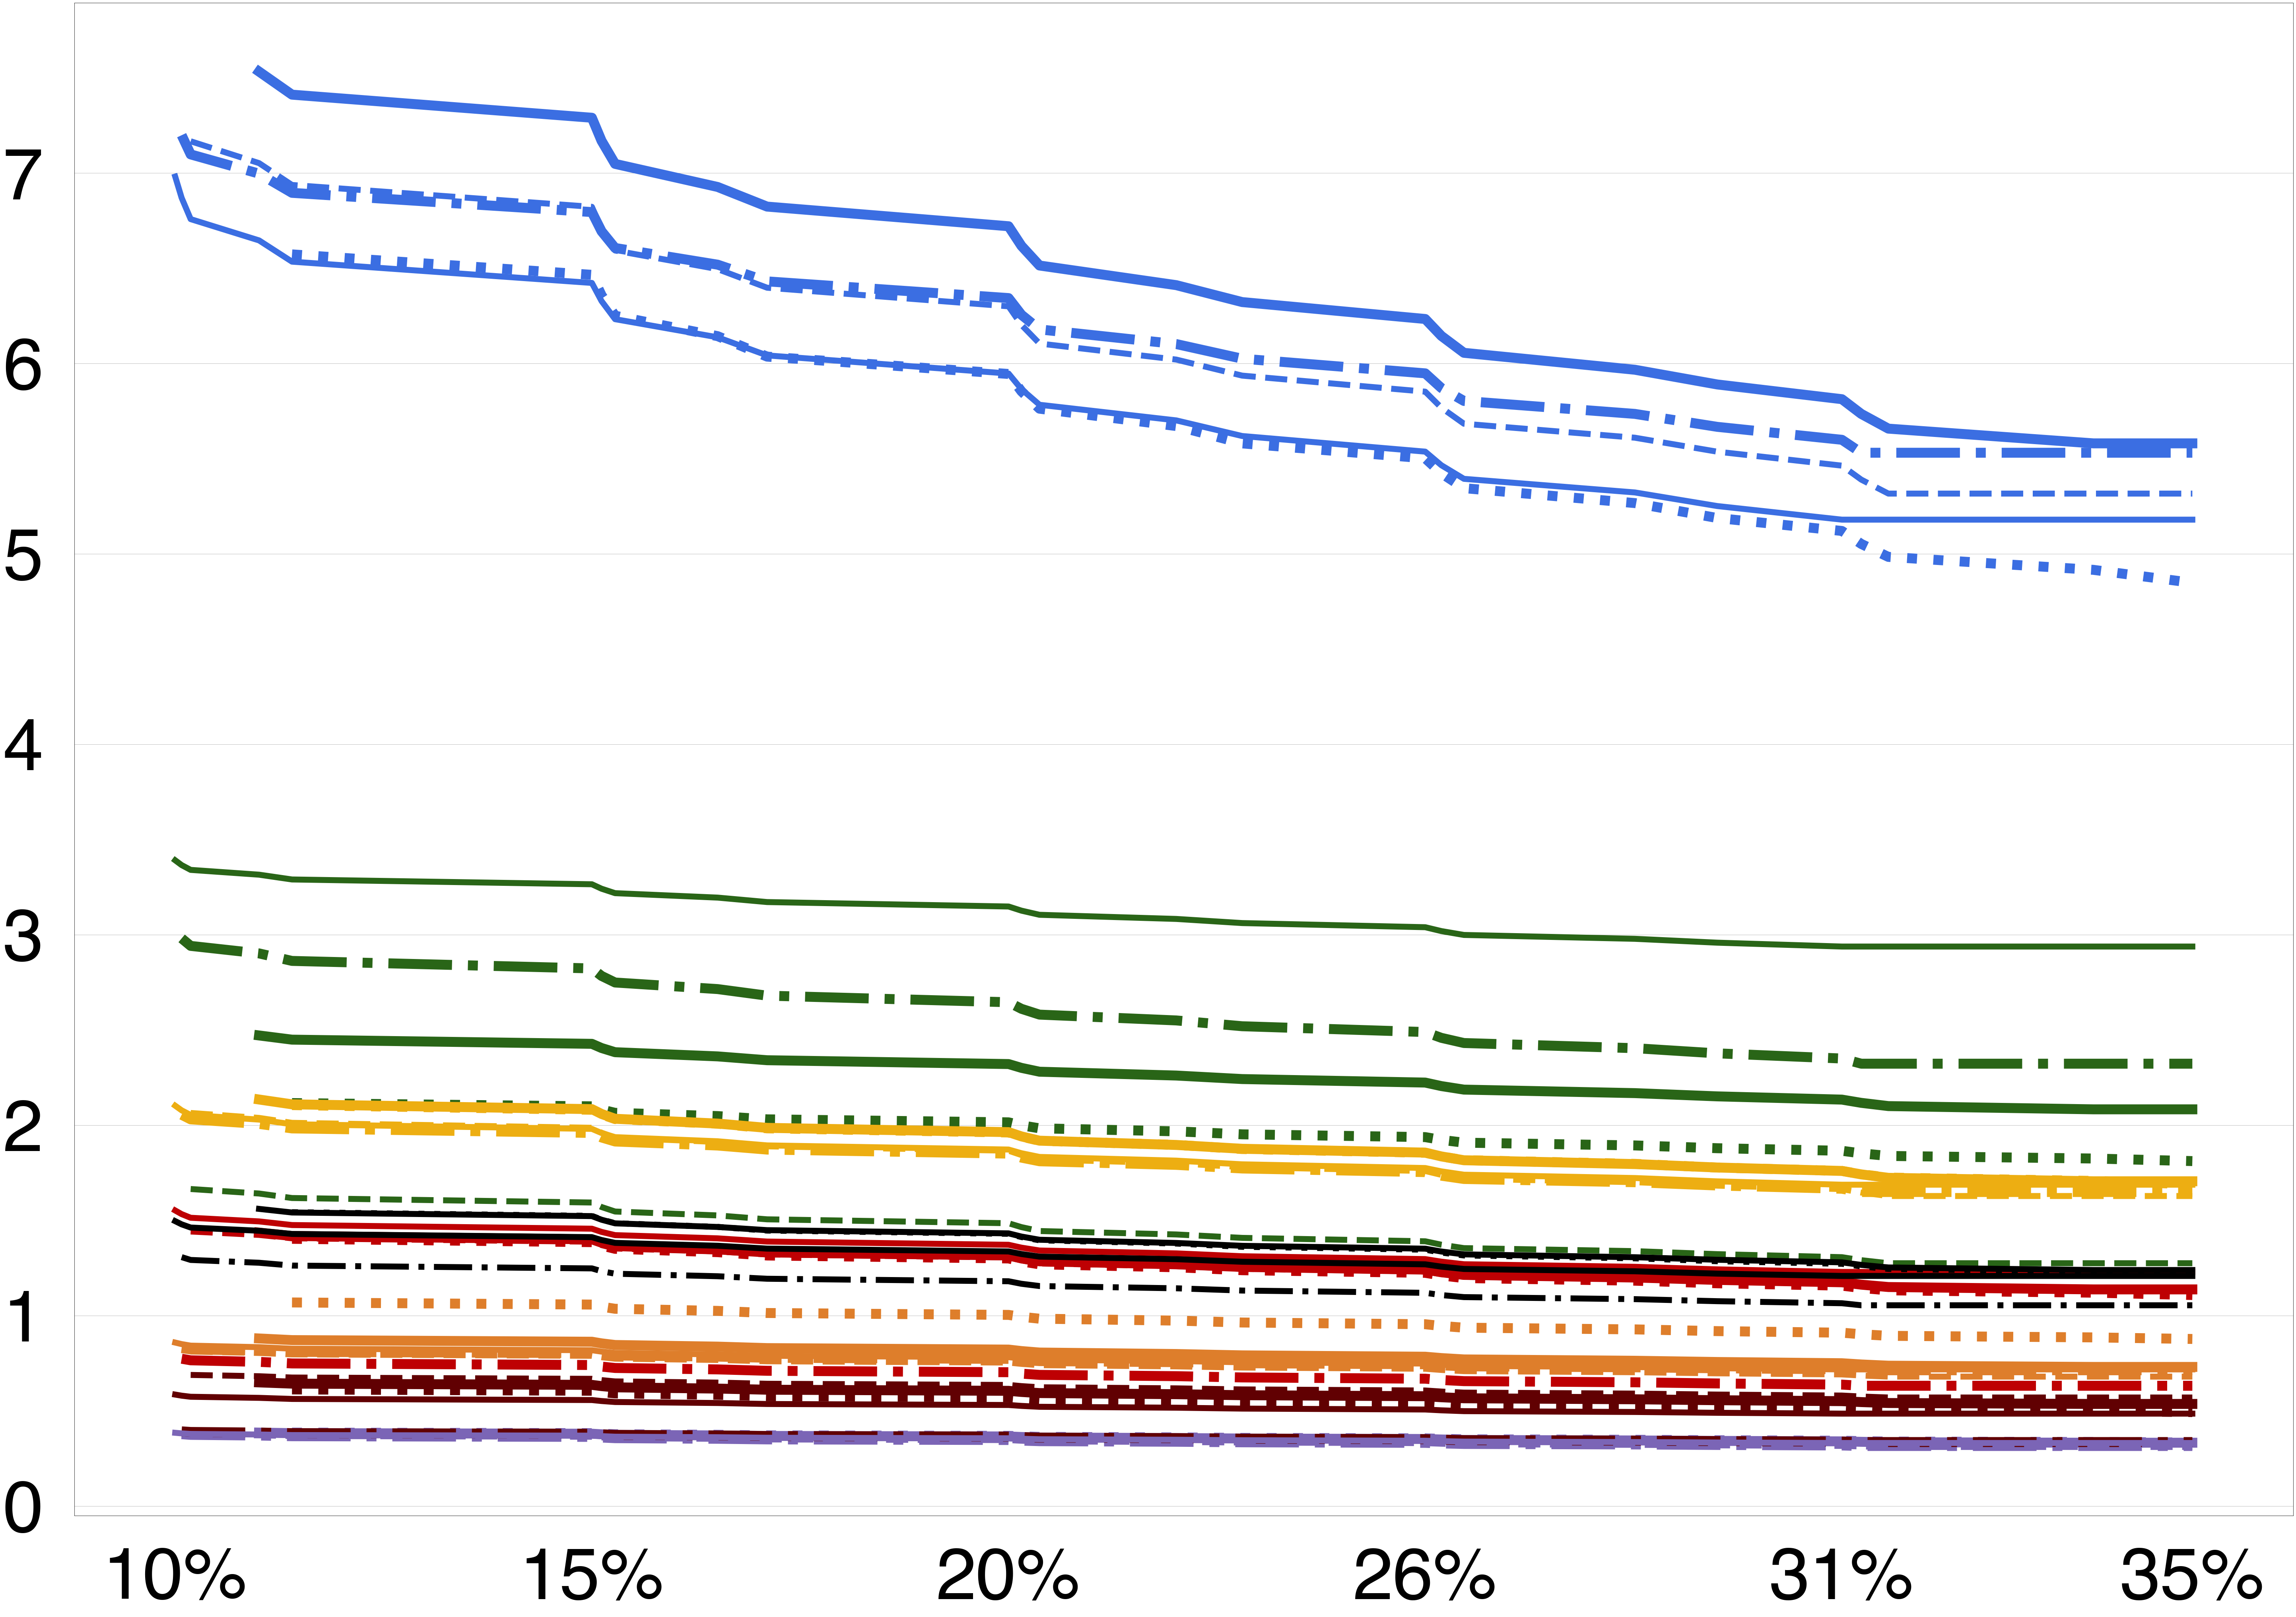

In [618]:
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})

from matplotlib.pyplot import gca

plt.figure(figsize=[100,70])




colors = [     
            '#EDAE12',
            '#3B6EE2',
            '#7B65B6',
            '#296517',
            '#610002',
            '#BE0003',
            '#DE7E2B',
         ]

dashes = [
            ':',
            '-',
            '-.',
            '-',
            '--'
         ]

linewidth = 25.

for col in stacked_df.columns:
    stacked_df[col] = stacked_df[col].astype('float')

df_plot = stacked_df.sort_values(by='values').interpolate().copy()
ticks = ['%.1f'%(val*100) for val in df_plot.index]
# ticks = ['-35%', '-20%', '', '+0%', '', '+25%', '+50%', '+75%']
ticks = ['10%',
 '',
 '',
 '',
 '',
 '15%',
 '',
 '',
 '',
 '',
 '20%',
 '',
 '',
 '',
 '',
 '26%',
 '',
 '',
 '',
 '',
 '31%',
 '',
 '',
 '',
 '35%']

for i, col in enumerate(df_plot.columns[:-1]):
    x = np.array(df_plot.index)
    y = np.array(df_plot[col])
    if i<35:
        c = colors[i%7]
        dashing = dashes[int(i/7)]
    else:
        c = 'black'
        dashing = dashes[(i-35)%5]
    
    if int(i/7) == 3 or i==38:
        linewidth = 15
    
    plt.xticks(x, ticks, fontsize=182, rotation=0)
    
#     plt.xlabel('\n Population projection (Billions)', fontsize=120)
    plt.yticks(fontsize=1)
#     plt.ylabel('Number of Countries', fontsize=120)
    plt.plot(x, y, color=c, linewidth=linewidth, linestyle=dashing)
    plt.grid(b=True, axis='y', which='major')

ax = plt.gca()
ax.tick_params(width=25, length=75, color='white')
plt.show()

## For cropland

In [594]:
values = np.array([.65, .8, .9, 1., 1.15, 1.25, 1.5, 1.75])
# values = np.round(np.array([1., 1.05, 1.10, 1.15, 1.20]), 2)

def expansion(x, y):
    if x==0:
        return 0
    else:
        return max(min(1., x+(y-1)),0)

diets = [0.23728686354880824, 0.22905550297316568, 0.20972663721021714, 0.20811659841733302, 0.21198181981961245]
cnty_diets = pd.read_csv('pctLS_SSPs_Bodirsky.csv', sep=';')[['Scenario', 'Region', '2050']].set_index('Scenario')
suffices = []
all_counts = []

pivot_cols = ['values', 'ssp1_Decreasing but not as vulnerable',
 'ssp1_Exporters',
 'ssp1_Importers',
 'ssp1_Increasing sufficiency',
 'ssp1_Most vulnerable',
 'ssp1_Newly vulnerable',
 'ssp1_Vulnerable but improving',
 'ssp2_Decreasing but not as vulnerable',
 'ssp2_Exporters',
 'ssp2_Importers',
 'ssp2_Increasing sufficiency',
 'ssp2_Most vulnerable',
 'ssp2_Newly vulnerable',
 'ssp2_Vulnerable but improving',
 'ssp3_Decreasing but not as vulnerable',
 'ssp3_Exporters',
 'ssp3_Importers',
 'ssp3_Increasing sufficiency',
 'ssp3_Most vulnerable',
 'ssp3_Newly vulnerable',
 'ssp3_Vulnerable but improving',
 'ssp4_Decreasing but not as vulnerable',
 'ssp4_Exporters',
 'ssp4_Importers',
 'ssp4_Increasing sufficiency',
 'ssp4_Most vulnerable',
 'ssp4_Newly vulnerable',
 'ssp4_Vulnerable but improving',
 'ssp5_Decreasing but not as vulnerable',
 'ssp5_Exporters',
 'ssp5_Importers',
 'ssp5_Increasing sufficiency',
 'ssp5_Most vulnerable',
 'ssp5_Newly vulnerable',
 'ssp5_Vulnerable but improving',
 'ssp1_global',
 'ssp2_global',
 'ssp3_global',
 'ssp4_global',
 'ssp5_global'
             ]

stacked_df = pd.DataFrame(columns=pivot_cols)
# stacked_df['values'] = values
stacked_df = stacked_df.set_index('values')

countries = ['ITA', 'ARG', 'SGP', 'NOR', 'IND', 'MEX', 'MAR']


for value in list(values):
    for i in range(5):
        data_path = 'outputs/compare/'
        df_ssp = pd.read_csv(data_path+'ssp'+str(i+1)+'_compare_new.csv')
#         df_ssp['%cropland_2050'] = df_ssp['%cropland_2000'].apply(lambda x: expansion(x, value))
        df_ssp['cal_per_ha_pred'] = df_ssp['cal_per_ha_2000'].apply(lambda x: x * value)
        
#         idx =  (df_ssp['%cropland_2050'] * df_ssp['ha_per_pixel']).sum()
        idx = value
        df_ssp.loc[:, 'calories_2050'] = df_ssp['%cropland_2050'] * df_ssp['cal_per_ha_pred'] * df_ssp['ha_per_pixel']
        
        #calculating global caloric sufficiency
        stacked_df.loc[idx, pivot_cols[36+i]] = cal_suff(df_ssp, year=2050, \
                                                           diet=diets[i])
        
        # filling for each country
        for j, country in enumerate(countries):
            
            my_diet = cnty_diets[cnty_diets['Region']==country]['2050']['ssp'+str(i+1)]
            stacked_df.loc[idx, pivot_cols[7*i + j + 1]] = cal_suff(df_ssp[df_ssp.ISO3==country], cntry=country, \
                                                                  year=2050, diet=my_diet)

In [595]:
stacked_df

,ssp1_Decreasing but not as vulnerable,ssp1_Exporters,ssp1_Importers,ssp1_Increasing sufficiency,ssp1_Most vulnerable,ssp1_Newly vulnerable,ssp1_Vulnerable but improving,ssp2_Decreasing but not as vulnerable,ssp2_Exporters,ssp2_Importers,...,ssp5_Importers,ssp5_Increasing sufficiency,ssp5_Most vulnerable,ssp5_Newly vulnerable,ssp5_Vulnerable but improving,ssp1_global,ssp2_global,ssp3_global,ssp4_global,ssp5_global
values,,,,,,,,,,,,,,,,,,,,,
0.65,1.49619,3.78749,0.357478,0.87969,0.360374,0.922438,0.402444,1.51378,4.27383,0.356688,...,0.338692,0.647237,0.405121,0.956634,0.307812,0.907049,0.935195,0.788175,0.905221,0.962499
0.80,1.68116,4.51573,0.360599,0.947819,0.417874,1.05045,0.459033,1.70378,5.1135,0.359988,...,0.341676,0.697326,0.472005,1.09251,0.341647,1.04722,1.08351,0.913143,1.04922,1.11625
0.90,1.80447,5.00122,0.36268,0.993239,0.456208,1.13579,0.496759,1.83044,5.67329,0.362187,...,0.343665,0.730718,0.516594,1.1831,0.364203,1.14067,1.18238,0.996454,1.14522,1.21875
1.00,1.92778,5.48671,0.36476,1.03866,0.494542,1.22113,0.534484,1.9571,6.23307,0.364387,...,0.345654,0.76411,0.561183,1.27369,0.386759,1.23412,1.28126,1.07977,1.24122,1.32125
1.15,2.11274,6.21494,0.367882,1.10679,0.552042,1.34914,0.591073,2.1471,7.07274,0.367687,...,0.348638,0.814199,0.628066,1.40957,0.420594,1.3743,1.42957,1.20473,1.38522,1.47501
1.25,2.23605,6.70043,0.369963,1.15221,0.590376,1.43448,0.628799,2.27376,7.63252,0.369886,...,0.350627,0.847591,0.672655,1.50016,0.44315,1.46775,1.52845,1.28805,1.48122,1.57751
1.50,2.54433,7.91416,0.375165,1.26575,0.686211,1.64783,0.723114,2.59042,9.03197,0.375385,...,0.3556,0.931073,0.784128,1.72662,0.499541,1.70137,1.77564,1.49633,1.72122,1.83376
1.75,2.85261,9.12788,0.380367,1.3793,0.782045,1.86118,0.817429,2.90708,10.4314,0.380884,...,0.360573,1.01455,0.8956,1.95309,0.555932,1.935,2.02282,1.7046,1.96122,2.09001


In [489]:
for col in stacked_df.columns:
    stacked_df[col] = stacked_df[col].astype('float')
    
stacked_df.sort_values(by='values').interpolate().to_csv('sa_cropland_final.csv')

In [550]:
ssp = 4

values = np.round(.19 * np.array([0.5, 0.75, 1., 1.25, 1.5]), 2)
for i in range(5):
    df = pd.read_csv(data_path+'ssp'+str(i+1)+'_compare_new.csv')
    for value in values:
        my_diet = diets[i]
        print(cal_suff(df, year=2050, food_waste=value, diet=my_diet))

1.686223169753017
1.7120457768701798
1.4410067361325793
1.6505173457520965
1.8028836870499383


In [513]:
cal_suff(df[df.ISO3=='NOR'], cntry='NOR', year=2050, feed_food_factor=3.45, diet=my_diet)

3.1937339518228165

In [516]:
my_diet

0.2539